## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

# Note: Written answers are within this folder's pdf file

**DATA CLEANING**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load df
df = pd.read_excel('GSS.xlsx')
df

,year,id_,wrkstat,educ,paeduc,maeduc,degree,padeg,madeg,rincome,satfin,finrela,unemp,ballot,prestg10,papres10,mapres10
0,1972,1,Working full time,4 years of college,10th grade,.i: Inapplicable,Bachelor's,Less than high school,.i: Inapplicable,.i: Inapplicable,Not satisfied at all,AVERAGE,.i: Inapplicable,.i: Inapplicable,45,45,.i: Inapplicable
1,1972,2,Retired,10th grade,8th grade,8th grade,Less than high school,Less than high school,Less than high school,.i: Inapplicable,More or less satisfied,ABOVE AVERAGE,.i: Inapplicable,.i: Inapplicable,50,39,.i: Inapplicable
2,1972,3,Working part time,12th grade,8th grade,8th grade,High school,Less than high school,Less than high school,.i: Inapplicable,Pretty well satisfied,AVERAGE,.i: Inapplicable,.i: Inapplicable,49,35,.i: Inapplicable
3,1972,4,Working full time,5 years of college,4 years of college,12th grade,Bachelor's,Bachelor's,High school,.i: Inapplicable,Not satisfied at all,AVERAGE,.i: Inapplicable,.i: Inapplicable,60,53,.i: Inapplicable
4,1972,5,Keeping house,12th grade,8th grade,8th grade,High school,Less than high school,Less than high school,.i: Inapplicable,Pretty well satisfied,ABOVE AVERAGE,.i: Inapplicable,.i: Inapplicable,31,40,.i: Inapplicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72385,2022,3541,Working full time,12th grade,12th grade,12th grade,High school,High school,High school,.i: Inapplicable,Not satisfied at all,BELOW AVERAGE,.i: Inapplicable,Ballot a,30,28,25
72386,2022,3542,Working full time,7 years of college,4 years of college,6 years of college,Graduate,Bachelor's,Graduate,$25000 OR MORE,More or less satisfied,AVERAGE,.i: Inapplicable,Ballot a,61,60,61
72387,2022,3543,Working full time,3 years of college,12th grade,2 years of college,Associate/junior college,High school,Associate/Junior college,$25000 OR MORE,Pretty well satisfied,ABOVE AVERAGE,NO,Ballot b,62,28,48
72388,2022,3544,Working full time,5 years of college,8 or more years of college,5 years of college,Graduate,Graduate,Graduate,$25000 OR MORE,Pretty well satisfied,ABOVE AVERAGE,NO,Ballot c,61,64,47


In [2]:
# Printing unique values for each columns, will delete incomplete values later
for col in df:
    print(col)
    print(df[col].unique())
    print()

year
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]

id_
[   1    2    3 ... 4508 4509 4510]

wrkstat
['Working full time' 'Retired' 'Working part time' 'Keeping house'
 'In school' 'Unemployed, laid off, looking for work'
 'With a job, but not at work because of temporary illness, vacation, strike'
 'Other' '.n:  No answer' '.s:  Skipped on Web'
 '.d:  Do not Know/Cannot Choose']

educ
['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' '.n:  No answer'
 'No formal schooling' '.d:  Do not Know/Cannot Choose']

paeduc
['10th grade' '8th grade' '4 years of college' '6 years of college'
 '12th

All of the values that aren't concrete answers either have the following descriptors (with their meaning)...

- `.i: Inapplicable`
- `.d: Do not Know/Cannot Choose`
- `.r: Refused`
- `.n: No answer`
- `.s: Skipped on web`

For simplicity, I'm going to remove rows with any of these values. We will still have an overwhelming amount of data point to analyze (over 7000), so I am confident we'll be able to draw similar conclusions to the data without cleaning.

Along with this, the prestige variables are strings, so lets change these to ints.

In [3]:
# deleting data points where not all responses are concrete
df = df[~df.apply(lambda row: any(row.astype(str).str.startswith(('.s', '.i', '.d', '.n', '.r'))), axis=1)]

# convert prestige columns to ints
df['prestg10'] = pd.to_numeric(df['prestg10'], errors='coerce')
df['papres10'] = pd.to_numeric(df['papres10'], errors='coerce')
df['mapres10'] = pd.to_numeric(df['mapres10'], errors='coerce')

df

/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/1464521637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prestg10'] = pd.to_numeric(df['prestg10'], errors='coerce')
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/1464521637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['papres10'] = pd.to_numeric(df['papres10'], errors='coerce')
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/1464521637.py:7: SettingWithCopyWarning: 
A value is trying to be 

,year,id_,wrkstat,educ,paeduc,maeduc,degree,padeg,madeg,rincome,satfin,finrela,unemp,ballot,prestg10,papres10,mapres10
29395,1994,8,Working full time,12th grade,8th grade,No formal schooling,High school,Less than high school,Less than high school,$10000 - 14999,Pretty well satisfied,AVERAGE,NO,Ballot b,38,48,53
29429,1994,42,Working full time,6 years of college,2 years of college,2 years of college,Graduate,High school,High school,$20000 - 24999,More or less satisfied,ABOVE AVERAGE,NO,Ballot b,61,58,31
29432,1994,45,"With a job, but not at work because of tempora...",1 year of college,6 years of college,2 years of college,High school,Graduate,High school,$1000 TO 2999,Not satisfied at all,AVERAGE,NO,Ballot c,31,48,48
29439,1994,52,Working full time,3 years of college,12th grade,1 year of college,High school,High school,High school,$20000 - 24999,Pretty well satisfied,BELOW AVERAGE,NO,Ballot b,46,35,48
29443,1994,56,Working full time,4 years of college,11th grade,12th grade,Bachelor's,Less than high school,High school,$25000 OR MORE,More or less satisfied,ABOVE AVERAGE,NO,Ballot c,31,38,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72368,2022,3524,Working full time,12th grade,12th grade,12th grade,High school,High school,High school,$20000 - 24999,More or less satisfied,AVERAGE,NO,Ballot b,35,35,48
72374,2022,3530,Working full time,12th grade,12th grade,10th grade,High school,High school,Less than high school,$25000 OR MORE,Pretty well satisfied,ABOVE AVERAGE,NO,Ballot b,47,40,33
72376,2022,3532,Working full time,4 years of college,12th grade,4 years of college,Bachelor's,High school,Associate/Junior college,$25000 OR MORE,More or less satisfied,AVERAGE,YES,Ballot c,31,45,50
72387,2022,3543,Working full time,3 years of college,12th grade,2 years of college,Associate/junior college,High school,Associate/Junior college,$25000 OR MORE,Pretty well satisfied,ABOVE AVERAGE,NO,Ballot b,62,28,48


**VISUALIZATIONS**

<Figure size 1000x600 with 0 Axes>

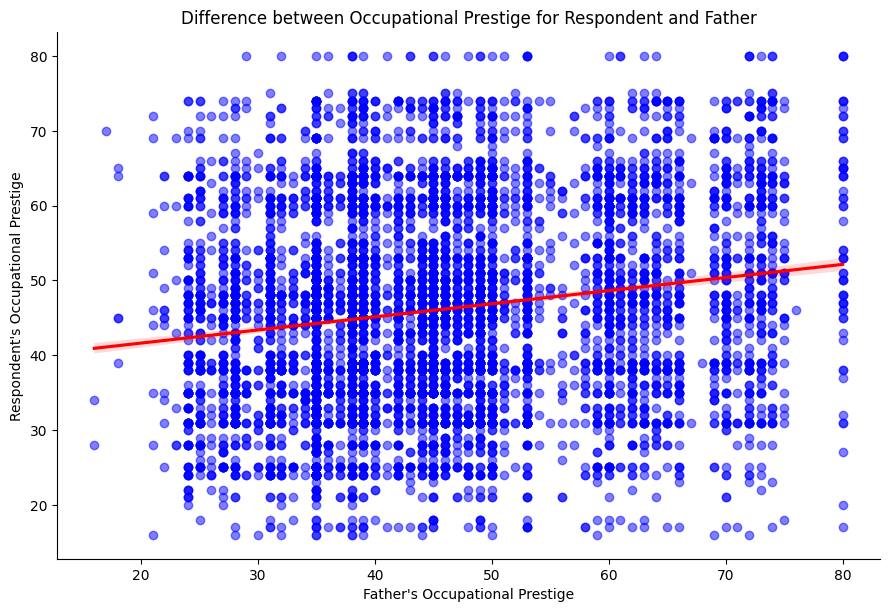

Correlation between Father's Prestige and Respondent's Prestige: 0.1731212693521306


<Figure size 1000x600 with 0 Axes>

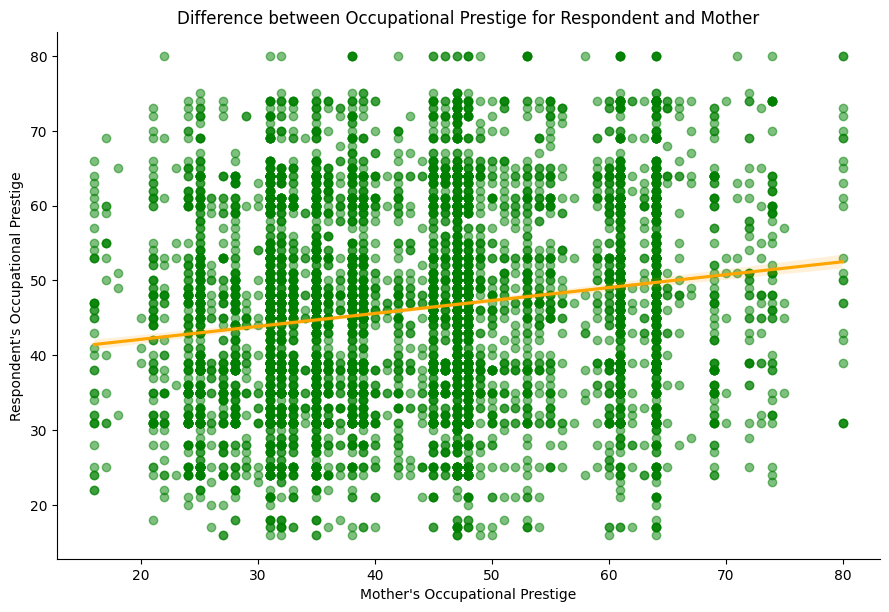

Correlation between Mother's Prestige and Respondent's Prestige: 0.1684536783129395


In [4]:
# plotting relation between prestige between the recipient and their parents

# respondent vs father
plt.figure(figsize=(10,6))
sns.lmplot(x='papres10', y='prestg10', data=df, 
           scatter_kws={'color': 'blue', 'alpha': 0.5},
           line_kws={'color': 'red'},
           height=6, aspect=1.5)
plt.xlabel('Father\'s Occupational Prestige')
plt.ylabel('Respondent\'s Occupational Prestige')
plt.title('Difference between Occupational Prestige for Respondent and Father')
plt.show()
# print correlation between columns
print("Correlation between Father's Prestige and Respondent's Prestige:", df['papres10'].corr(df['prestg10']))

# respondent vs mother
plt.figure(figsize=(10,6))
sns.lmplot(x='mapres10', y='prestg10', data=df, 
           scatter_kws={'color': 'green', 'alpha': 0.5},
           line_kws={'color': 'orange'},
           height=6, aspect=1.5);
plt.xlabel('Mother\'s Occupational Prestige')
plt.ylabel('Respondent\'s Occupational Prestige')
plt.title('Difference between Occupational Prestige for Respondent and Mother')
plt.show()
# print correlation between columns
print("Correlation between Mother's Prestige and Respondent's Prestige:", df['mapres10'].corr(df['prestg10']))

/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/2262781864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['degree'] = pd.Categorical(df['degree'], categories=r_order)
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/2262781864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['padeg'] = pd.Categorical(df['padeg'], categories=mapa_order)
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/2262781864.py:8: SettingWithCopyWarning: 
A value is trying to be

<Figure size 1000x600 with 0 Axes>

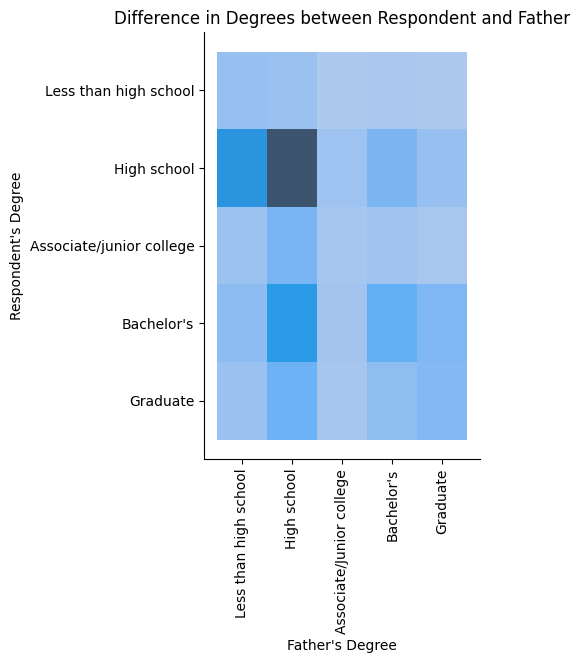

<Figure size 1000x600 with 0 Axes>

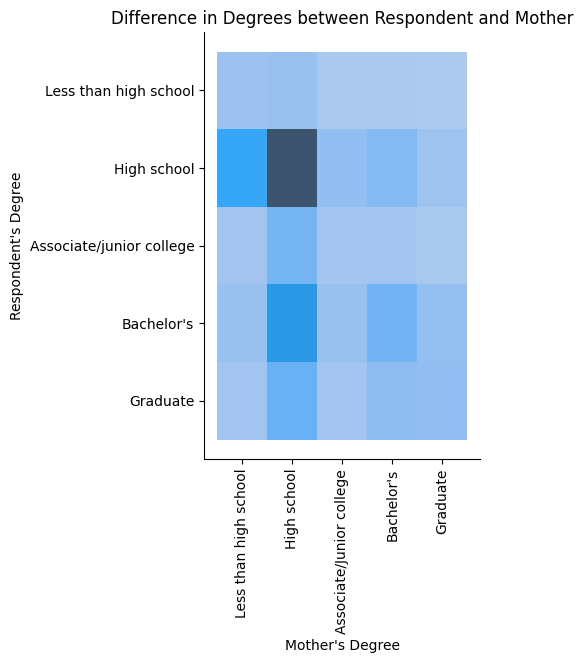

In [5]:
# Plotting the difference in degrees between the recipient and their parents

# Setting order for plots
r_order = ['Less than high school', 'High school', 'Associate/junior college', "Bachelor's", 'Graduate']
mapa_order = ['Less than high school', 'High school', 'Associate/Junior college', "Bachelor's", 'Graduate']
df['degree'] = pd.Categorical(df['degree'], categories=r_order)
df['padeg'] = pd.Categorical(df['padeg'], categories=mapa_order)
df['madeg'] = pd.Categorical(df['madeg'], categories=mapa_order)

# Respondent vs Father
plt.figure(figsize=(10,6))
sns.displot(df, x='padeg', y='degree')
plt.xlabel('Father\'s Degree')
plt.ylabel('Respondent\'s Degree')
plt.title('Difference in Degrees between Respondent and Father')
plt.xticks(rotation=90)
plt.show()

# Respondent vs Mother
plt.figure(figsize=(10,6))
sns.displot(df, x='madeg', y='degree')
plt.xlabel('Mother\'s Degree')
plt.ylabel('Respondent\'s Degree')
plt.title('Difference in Degrees between Respondent and Mother')
plt.xticks(rotation=90)
plt.show()


/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/3301084063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['educ'] = pd.Categorical(df['educ'], categories=order)
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/3301084063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paeduc'] = pd.Categorical(df['paeduc'], categories=order)
/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_8363/3301084063.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

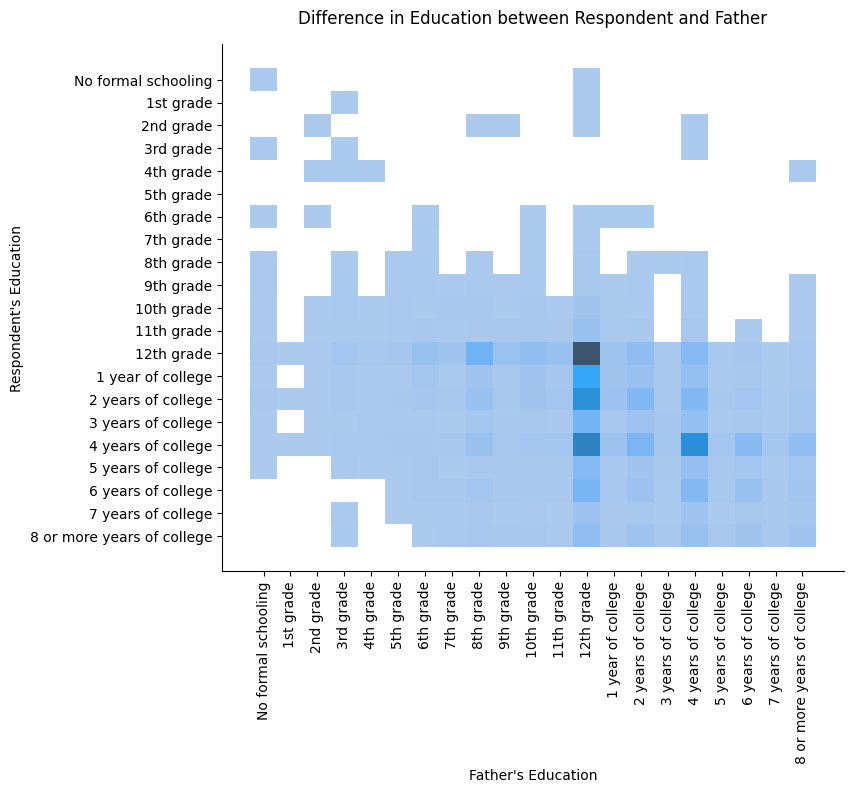

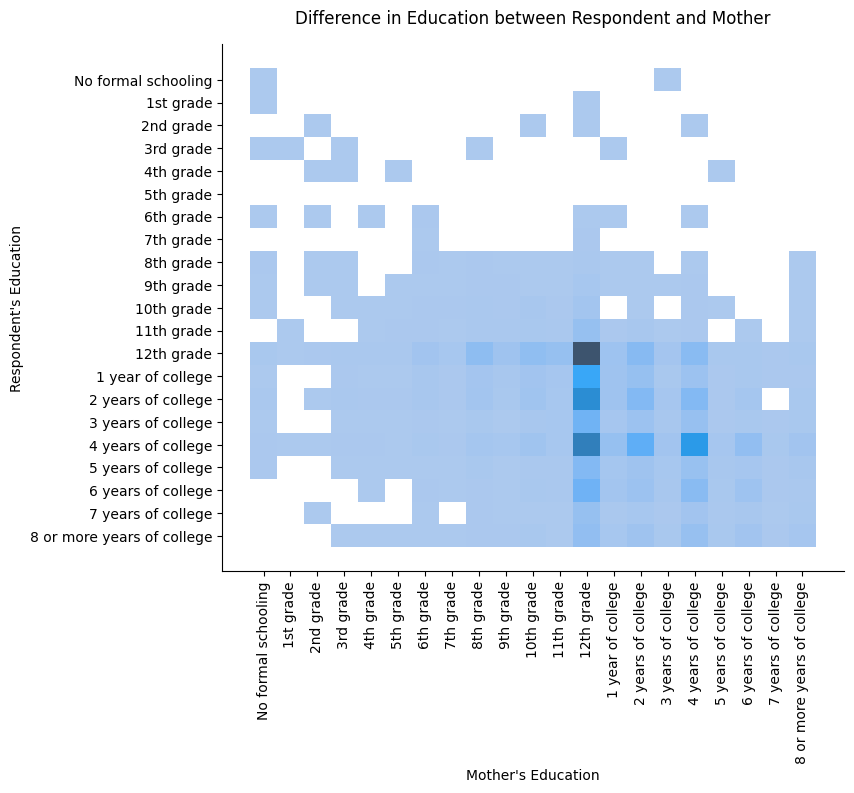

In [6]:
# create ideal order for education
order = ['No formal schooling', '1st grade', '2nd grade', '3rd grade', '4th grade', '5th grade', '6th grade', 
         '7th grade', '8th grade', '9th grade', '10th grade', '11th grade', '12th grade', '1 year of college', 
         '2 years of college', '3 years of college', '4 years of college', '5 years of college', '6 years of college', 
         '7 years of college', '8 or more years of college']

# apply order to education columns
df['educ'] = pd.Categorical(df['educ'], categories=order)
df['paeduc'] = pd.Categorical(df['paeduc'], categories=order)
df['maeduc'] = pd.Categorical(df['maeduc'], categories=order)

# plots for education differences between respondent and each parent
# respondent vs father
sns.displot(df, x='paeduc', y='educ', height=6, aspect=1.5)
plt.xlabel('Father\'s Education')
plt.ylabel('Respondent\'s Education')
plt.title('Difference in Education between Respondent and Father', pad=15)
plt.xticks(rotation=90)
plt.show()

# respondent vs mother
sns.displot(df, x='maeduc', y='educ', height=6, aspect=1.5)
plt.xlabel('Mother\'s Education')
plt.ylabel('Respondent\'s Education')
plt.title('Difference in Education between Respondent and Mother', pad=15)
plt.xticks(rotation=90)
plt.show()

In [7]:
# separate df into three columns, by whether both, none, or one of respondent's parents have occupational prestige over 50
high_pres_parents = df[(df['mapres10'] >= 50) & (df['papres10'] >= 50)]
low_pres_parents = df[(df['mapres10'] < 50) & (df['papres10'] < 50)]
mix_pres_parents = df[((df['mapres10'] >= 50) & (df['papres10'] < 50)) | ((df['mapres10'] < 50) & (df['papres10'] >= 50))]

# calculate proportion of unemployed for each df
high_pres_unemp_prop = high_pres_parents['unemp'].value_counts(normalize=True)['YES']
low_pres_unemp_prop = low_pres_parents['unemp'].value_counts(normalize=True)['YES']
mix_pres_unemp_prop = mix_pres_parents['unemp'].value_counts(normalize=True)['YES']

# print unemployent proportions
print(f"Proportion of unemployed for respondents with high prestige parents: {high_pres_unemp_prop}")
print(f"Proportion of unemployed for respondents with low prestige parents: {low_pres_unemp_prop}")
print(f"Proportion of unemployed for respondents mixed prestige parents: {mix_pres_unemp_prop}")

Proportion of unemployed for respondents with high prestige parents: 0.38493723849372385
Proportion of unemployed for respondents with low prestige parents: 0.35789473684210527
Proportion of unemployed for respondents mixed prestige parents: 0.3657049979683056


In [8]:
# calculate proportion of satisfaction of financial situation
high_pres_satfin_prop = high_pres_parents['satfin'].value_counts(normalize=True)['Pretty well satisfied']
low_pres_satfin_prop = low_pres_parents['satfin'].value_counts(normalize=True)['Pretty well satisfied']
mix_pres_satfin_prop = mix_pres_parents['satfin'].value_counts(normalize=True)['Pretty well satisfied']

# print satisfaction proportions
print(f"Proportion of strong satisfaction for respondents with high prestige parents: {high_pres_satfin_prop}")
print(f"Proportion of strong satisfaction for respondents with low prestige parents: {low_pres_satfin_prop}")
print(f"Proportion of strong satisfaction for respondents with mixed prestige parents: {mix_pres_satfin_prop}")

Proportion of strong satisfaction for respondents with high prestige parents: 0.34518828451882844
Proportion of strong satisfaction for respondents with low prestige parents: 0.2660954712362301
Proportion of strong satisfaction for respondents with mixed prestige parents: 0.3010971149939049


/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_82445/3058758018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rincome'] = pd.Categorical(df['rincome'], categories=order)


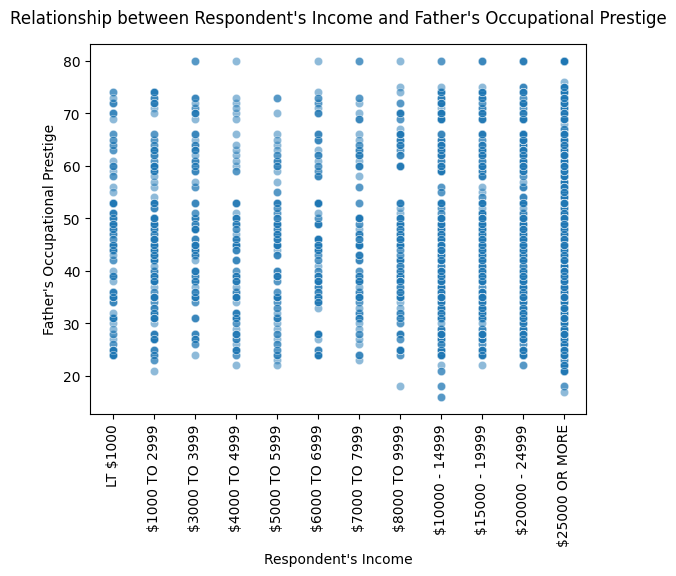

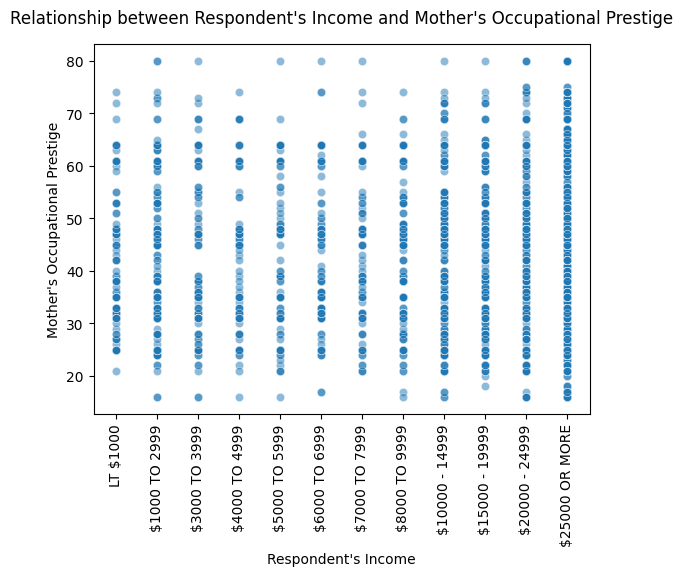

Proportion of $25000+ income for respondents with high prestige parents: 0.698744769874477
Proportion of $25000+ income for respondents with low prestige parents: 0.5968176254589963
Proportion of $25000+ income for respondents with mixed prestige parents: 0.6607070296627388


In [84]:
# create sequential order for income
order = ['LT $1000', '$1000 TO 2999', '$3000 TO 3999', '$4000 TO 4999', '$5000 TO 5999', 
         '$6000 TO 6999', '$7000 TO 7999', '$8000 TO 9999', '$10000 - 14999', 
         '$15000 - 19999', '$20000 - 24999', '$25000 OR MORE']

# resassign order to rincome column
df['rincome'] = pd.Categorical(df['rincome'], categories=order)

# plot relation between incomes
sns.scatterplot(data=df, x='rincome', y='papres10', alpha=0.5)
plt.xlabel('Respondent\'s Income')
plt.ylabel('Father\'s Occupational Prestige')
plt.title('Relationship between Respondent\'s Income and Father\'s Occupational Prestige', pad=15)
plt.xticks(rotation=90)
plt.show()

# plot relation between incomes
sns.scatterplot(data=df, x='rincome', y='mapres10', alpha=0.5)
plt.xlabel('Respondent\'s Income')
plt.ylabel('Mother\'s Occupational Prestige')
plt.title('Relationship between Respondent\'s Income and Mother\'s Occupational Prestige', pad=15)
plt.xticks(rotation=90)
plt.show()

# calculate proportion of $25000+ income
high_pres_income_prop = high_pres_parents['rincome'].value_counts(normalize=True)['$25000 OR MORE']
low_pres_income_prop = low_pres_parents['rincome'].value_counts(normalize=True)['$25000 OR MORE']
mix_pres_income_prop = mix_pres_parents['rincome'].value_counts(normalize=True)['$25000 OR MORE']

# print rincome proportions
print(f"Proportion of $25000+ income for respondents with high prestige parents: {high_pres_income_prop}")
print(f"Proportion of $25000+ income for respondents with low prestige parents: {low_pres_income_prop}")
print(f"Proportion of $25000+ income for respondents with mixed prestige parents: {mix_pres_income_prop}")